<a href="https://colab.research.google.com/github/19K41A0518/AI/blob/main/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive.zip to archive.zip


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
# Complete path to storage location of the .zip file of data
zip_path = 'drive/My Drive/DS 518/archive.zip'
# Check current directory (be sure you're in the directory where Colab operates: '/content')
os.getcwd()
# Copy the .zip file into the present directory
!cp '{zip_path}' .
# Unzip quietly 
!unzip -q 'archive.zip'
# View the unzipped contents in the virtual machine
os.listdir()

cp: cannot stat 'drive/My Drive/DS 518/archive.zip': No such file or directory
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

['.config', 'cell_images', 'drive', 'archive.zip', 'sample_data']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#image data generataor
datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.2)

In [ ]:
train_generator = datagen.flow_from_directory(
    'cell_images',
    target_size=(150,150),
    shuffle=True,
    subset='training'
)

Found 22048 images belonging to 2 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    'cell_images',
    target_size=(150,150),
    subset='validation'
)

Found 5510 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth_convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid') 
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 37s - loss: 0.7003 - accuracy: 0.5038 - val_loss: 0.6945 - val_accuracy: 0.4938 - 37s/epoch - 1s/step
Epoch 2/20
25/25 - 35s - loss: 0.6903 - accuracy: 0.5525 - val_loss: 0.6844 - val_accuracy: 0.5562 - 35s/epoch - 1s/step
Epoch 3/20
25/25 - 37s - loss: 0.6640 - accuracy: 0.6000 - val_loss: 0.6362 - val_accuracy: 0.6062 - 37s/epoch - 1s/step
Epoch 4/20
25/25 - 35s - loss: 0.6930 - accuracy: 0.5462 - val_loss: 0.6931 - val_accuracy: 0.4875 - 35s/epoch - 1s/step
Epoch 5/20
25/25 - 35s - loss: 0.6805 - accuracy: 0.6062 - val_loss: 0.6510 - val_accuracy: 0.6562 - 35s/epoch - 1s/step
Epoch 6/20
25/25 - 35s - loss: 0.5697 - accuracy: 0.7400 - val_loss: 0.6161 - val_accuracy: 0.6875 - 35s/epoch - 1s/step
Epoch 7/20
25/25 - 35s - loss: 0.4455 - accuracy: 0.7987 - val_loss: 0.2665 - val_accuracy: 0.9312 - 35s/epoch - 1s/step
Epoch 8/20
25/25 - 36s - loss: 0.2643 - accuracy: 0.9200 - val_loss: 0.2389 - val_accuracy: 0.9312 - 36s/epoch - 1s/step
Epoch 9/20
25/25 - 35s - loss: 0

In [ ]:
model.save("malaria_cell.h5")

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

173/173 [==============================] - 71s 404ms/step
confusion matrix
[[2795    0]
 [   0 2715]]


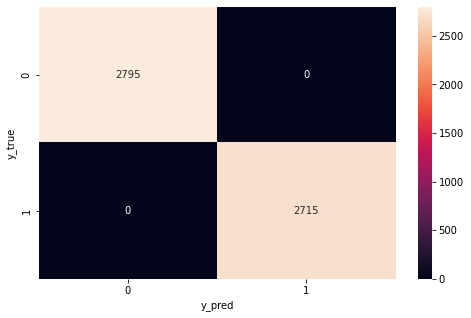

In [ ]:
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 7.3 MB/s 
     |████████████████████████████████| 182 kB 64.5 MB/s 
     |████████████████████████████████| 4.7 MB 30.2 MB/s 
     |████████████████████████████████| 164 kB 49.7 MB/s 
     |████████████████████████████████| 237 kB 53.8 MB/s 
     |████████████████████████████████| 78 kB 7.1 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 51 kB 7.3 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=2b4afe88dfaeacc7134b726a0d0a763baa6c6188762e09ed49931b97246fe78a
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [ ]:
import streamlit as st #we can call this library as st in the code that we will create.
import tensorflow as tf #we can call this library as tf in the code.
import numpy as np #we can call this library as np in the code.
from PIL import Image, ImageOps #we can call this library for load images and performing operations on load images.

In [ ]:
st.write("""
# Malaria Cell Classification
"""
)

  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2022-10-26 11:03:47.816 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
upload_file = st.sidebar.file_uploader("Upload Cell Images", type="png")

In [ ]:
Generate_pred=st.sidebar.button("Predict")

In [ ]:
model=tf.keras.models.load_model('malaria_cell.h5') #The model created, saved under the name malaria_cell.h5.

In [ ]:
def import_n_pred(image_data, model):
    size = (150,150)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    reshape=img[np.newaxis,...]
    pred = model.predict(reshape)
    return pred

In [ ]:
if Generate_pred:
    image=Image.open(upload_file)
    with st.beta_expander('Cell Image', expanded = True):
        st.image(image, use_column_width=True)
    pred=import_n_pred(image, model)
    labels = ['Parasitized', 'Uninfected']
    st.title("Prediction of image is {}".format(labels[np.argmax(pred)]))

In [43]:
!streamlit --version

2022-10-26 14:33:51.058 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
Streamlit, version 1.13.0


In [45]:
!streamlit run Malaria.ipynb

2022-10-26 14:37:14.063 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
Usage: streamlit run [OPTIONS] TARGET [ARGS]...

Error: Streamlit requires raw Python (.py) files, not .ipynb.
For more information, please see https://docs.streamlit.io
